<a href="https://colab.research.google.com/github/YBilodeau/Metabolic-Syndrome-Prediction-Project/blob/main/Metabolic_Syndrome_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metabolic Syndrome Prediction**

- Yvon Bilodeau
- March 2022



---



### **Project Description**


To predict metabolic syndrome, yes or not based on common risk factors

The dataset for analysis came from the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) initiative where the following variables were combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). Numerous other variables were added, such as uric acid, race, income, etc. that might contribute to the model but we will not sure, until we test the model.

### **Source of data**

- [Data World](https://data.world/informatics-edu/metabolic-syndrome-prediction)


## **Mount Data | Import Libraries | Load the Dataset**

### **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Dummy Classifier
from sklearn.dummy import DummyClassifier

# Lostics Regression Classifier
from sklearn.linear_model import LogisticRegression

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Import Metrics
from sklearn.metrics import accuracy_score, classification_report

### **Load the Dataset**

- Data downloaded from [link](https://data.world/informatics-edu/metabolic-syndrome-prediction/file/Metabolic%20%20Syndrome.csv).

In [5]:
filename = "/content/drive/MyDrive/Colab Notebooks/CodingDojo/000 Data Files/Metabolic  Syndrome.csv"
df = pd.read_csv(filename)

## **Inspect the Data**

### Display Rows and Column Count

In [6]:
# The .shape attribute returns a tuple of length 2, representing the dimensionality of the DataFrame.  
# The number of rows and columns of the DataFrame.
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 2401 rows, and 15 columns.
The rows represent 2401 observations, and the columns represent 14 features and 1 target variable.


### Display Data Types

In [7]:
# The .dtype attribute returns a Series with the data type of each column.
# Columns with mixed types are stored with the object dtype.
df.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

### Display Column Names, Count of Non-Null Values, and Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


### Display First (10) Rows

In [9]:
df.head(10)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,No MetSyn
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,No MetSyn
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,No MetSyn
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,No MetSyn
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,No MetSyn


- Data appears to have loaded correctly.

## **Clean the Data**

In [10]:
# Describe number columns
df.describe()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,67030.674302,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,2823.565114,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,62161.000000,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,64591.000000,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,67059.000000,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,69495.000000,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,71915.000000,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


In [12]:
# Describe non-number columns
df.describe(exclude="number")

,Sex,Marital,Race,MetabolicSyndrome
count,2401,2193,2401,2401
unique,2,5,6,2
top,Female,Married,White,No MetSyn
freq,1211,1192,933,1579


### **Remove Duplicates**

In [13]:
# Count the number of duplicate rows.
df.duplicated().sum()

0

In [14]:
# Drop the duplicate wows
df.drop_duplicates(keep='first', inplace=True)
df.shape

(2401, 15)

In [15]:
# Confirm duplicate rows have been dropped
df.duplicated().sum()

0

- No duplicates were found or dropped.

### **Missing Values**

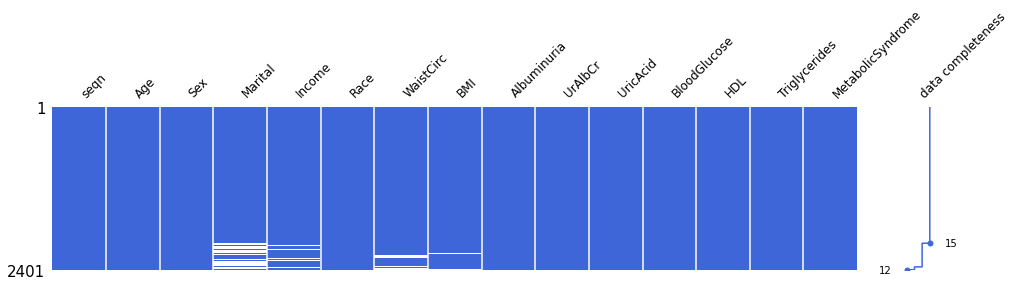

In [16]:
# Missing number display
msno.matrix(df, figsize=(16,3), labels=True, fontsize=12, sort="descending", color=	(.25,.4,.85));

In [17]:
print(df.isna().sum())

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64


- 'Marital', 'Income', 'WaistCirc' and 'BMI' columns have missing values.

#### 'Marital' column
- 'Marital' has 208 missing values. 

In [21]:
# Display rows with missing 'Age' values and their count
print(df.Marital.isna().sum())
df[df.Marital.isna()][0:50]

208


,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,No MetSyn
10,62199,57,Male,NaN,9000.0,White,107.8,28.0,0,4.16,6.0,100,35,98,MetSyn
24,62239,22,Female,NaN,300.0,Hispanic,78.9,23.3,0,5.33,4.1,90,42,68,No MetSyn
42,62332,22,Male,NaN,1600.0,White,110.7,32.6,0,8.83,8.0,112,43,178,MetSyn
64,62413,65,Male,NaN,2000.0,White,127.5,40.0,0,8.73,9.3,70,63,169,MetSyn
73,62464,32,Male,NaN,3500.0,White,98.6,28.2,0,5.20,6.8,95,51,122,No MetSyn
78,62475,22,Male,NaN,300.0,White,85.1,25.8,0,2.65,6.0,84,51,61,No MetSyn
83,62482,32,Female,NaN,2500.0,White,94.4,26.5,0,7.23,4.5,85,47,122,No MetSyn
88,62502,35,Male,NaN,1000.0,Black,112.0,36.5,0,3.16,7.2,101,62,111,No MetSyn
89,62504,30,Female,NaN,1000.0,Hispanic,111.5,38.9,0,5.33,5.0,92,43,134,No MetSyn


- This is a string object datatype with only two values.
 - 1. These values can be imputed using SimpleImputer(strategy='most_frequent').
     - strategy='most_frequent' can be used with strings or numeric data.
 - 2.     

#### 'Income' column
- 'Income' has 117 missing values.

In [20]:
print(df['Income'].unique())

[8200. 4500.  800. 2000.   nan  300. 9000. 6200. 1000. 2500. 3500. 1500.
 1600. 5400. 1700.]


- This is a float64 numeric datatype with unique 14 values, and 117 Nans.

### Ensure all columns match the data types listed in the data dictionary.

In [ ]:
df.dtypes

Age            float64
Gender          object
BP              object
Cholesterol     object
Na_to_K         object
Drug            object
dtype: object

In [ ]:
df.head()

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,59.0,M,High,HIGH,13.935,drugQ
1,40.0,F,Normal,HIGH,10.103,drugZ
2,NaN,M,Normal,HIGH,9.084,drugZ
3,62.0,M,Normal,HIGH,16.594,drugZ
4,55.0,F,High,NORMAL,10.977,drugQ


- 'Na_to_K' should be a float number type.

#### **'Na_to_K' column**

In [ ]:
# Display 'Na_to_K'  values.
df['Na_to_K'][250:281]

261     10.292
262     11.262
263     19.796
264     11.198
266      8.966
267      15.79
268      9.567
269     13.967
270    10.403_
271     10.977
272     15.969
273     18.457
274      9.381
276     12.894
277     21.036
278     25.741
280      8.011
281       7.49
282      9.894
283      7.845
284      12.26
285      11.34
286      14.02
287     12.307
288     29.875
289     14.642
290     18.295
292     10.065
293     11.014
294      9.475
295     12.879
Name: Na_to_K, dtype: object

- Index 270 has a value of '10.403_'.  
- '_' should be removed.

In [ ]:
# Remove '_' from all Na_to_K' 'values.
df.loc[:,'Na_to_K'] = df.loc[:,'Na_to_K'].str.replace('_', '')

In [ ]:
# Confirm '_' has been removed from index 270
df.loc[:,'Na_to_K'][270]

'10.403'

In [ ]:
# Change the datatype for the 'Na_to_K' column to float64 datatype
df['Na_to_K'] = df['Na_to_K'].astype('float64')

In [ ]:
# Review and confirm datatypes for all columns
df.dtypes

Age            float64
Gender          object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

- All columns match datatypes.

### **Inspect Column Names with Object Datatypes**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.(example: cat, Cat, cats)

In [ ]:
# Display column names for object datatypes
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Gender', 'BP', 'Cholesterol', 'Drug'], dtype='object')

### **Inspect Column Names with Numerical Datatypes**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.(example: cat, Cat, cats)

In [ ]:
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the numerical datatypes
numerical_data_types = data_types[(data_types == "float64") | (data_types == "int64")]
# Display the series of numerical datatypes
numerical_data_types

Age        float64
Na_to_K    float64
dtype: object

In [ ]:
# Display column names for numeric columns
dtypes = df.dtypes
str_cols = data_types[(data_types == "float64") | (data_types == "int64")].index
str_cols

Index(['Age', 'Na_to_K'], dtype='object')

### **Inspect Data in Columns with Object Datatypes**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.

In [ ]:
df.describe(exclude="number")

,Gender,BP,Cholesterol,Drug
count,281,281,281,281
unique,8,4,5,2
top,M,High,HIGH,drugZ
freq,140,128,145,147


#### **'Gender' column**

In [ ]:
# Display values
print(df['Gender'].unique())

['M' 'F' 'male' 'female' 'Female' 'Male' 'femal' 'Femal']


In [ ]:
# Display values and their counts
df.groupby(['Gender'])['Gender'].count()

Gender
F         131
Femal       1
Female      1
M         140
Male        1
femal       1
female      2
male        4
Name: Gender, dtype: int64

- Replace 'M' and 'male' with 'Male'.
- Replace 'F', 'female', 'femal', and 'Femal' with 'Female'.

In [ ]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {'male': 'Male', 'M': 'Male',
         'F': 'Female', 'female': 'Female', 'Femal': 'Female', 'femal': 'Female'}

df.replace({'Gender': dict}, inplace = True)

In [ ]:
# Display and confirm values have been replaced
print(df['Gender'].unique())

['Male' 'Female']


- Replacement values confirmed.

#### **'BP' column**

In [ ]:
# Display values
print(df['BP'].unique())

['High' 'Normal' 'Unknown' 'Low']


In [ ]:
# Display values and their counts
df.groupby(['BP'])['BP'].count()

BP
High       128
Low         32
Normal      46
Unknown     75
Name: BP, dtype: int64

- No issues noted.

#### **'Cholesterol' column**

In [ ]:
# Display values
print(df['Cholesterol'].unique())

['HIGH' 'NORMAL' 'NORM' 'norm' 'high']


In [ ]:
# Display values and their counts
df.groupby(['Cholesterol'])['Cholesterol'].count()

Cholesterol
HIGH      145
NORM        6
NORMAL    114
high        7
norm        9
Name: Cholesterol, dtype: int64

- Replace 'HIGH' with 'high'.
- Replace 'NORM', 'NORMAL', 'norm' with 'normal'.

In [ ]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {'HIGH': 'High', 'high': 'High',
         'NORM': 'Normal', 'norm': 'Normal', 'NORMAL': 'Normal'}

df.replace({'Cholesterol': dict}, inplace = True)

In [ ]:
# Display and confirm values have been replaced
print(df['Cholesterol'].unique())

['High' 'Normal']


- Replacement values confirmed.

#### **'Drug' column**

In [ ]:
# Display values
print(df['Drug'].unique())

['drugQ' 'drugZ']


In [ ]:
# Display values and their counts
df.groupby(['Drug'])['Drug'].count()

Drug
drugQ    134
drugZ    147
Name: Drug, dtype: int64

- No issues noted.

### **Inspect Data in Columns with Numerical Datatypes**

- Filter columns with numerical indexes.

In [ ]:
# Summary statistics for Numeric Columns
df.describe()

,Age,Na_to_K
count,227.000000,281.000000
mean,47.475771,14.862769
std,38.359652,6.474826
min,15.000000,6.269000
25%,32.000000,10.446000
50%,45.000000,12.856000
75%,59.000000,17.206000
max,570.000000,38.247000


- 'Age' has a max value of '570'.

#### **Age**

In [ ]:
df.loc[df['Age'] == 570, :]

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
232,570.0,Female,Normal,High,14.216,drugZ


- There is only 1 instance, so this instance can be dropped.

In [ ]:
# Drop the row with the inappropriate value.
df = df.drop(index = 232)

In [ ]:
# Confirm row with this value has been dropped.
df.loc[df['Age'] == 570, :]

,Age,Gender,BP,Cholesterol,Na_to_K,Drug


In [ ]:
# Review and confirm summary statistics
df.describe()

,Age,Na_to_K
count,226.000000,280.000000
mean,45.163717,14.865079
std,16.098439,6.486304
min,15.000000,6.269000
25%,32.000000,10.446000
50%,44.500000,12.856000
75%,58.750000,17.207250
max,74.000000,38.247000


- No issues noted.

## **Exploratory Data Analysis**

### **Numeric Columns**

In [ ]:
df.describe()

,Age,Na_to_K
count,226.000000,280.000000
mean,45.163717,14.865079
std,16.098439,6.486304
min,15.000000,6.269000
25%,32.000000,10.446000
50%,44.500000,12.856000
75%,58.750000,17.207250
max,74.000000,38.247000


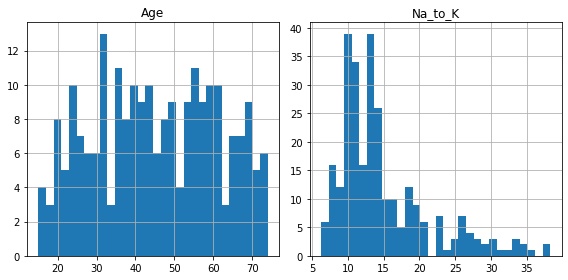

In [ ]:
df.hist(figsize=(8,4), bins=30)
plt.tight_layout()
plt.show;

- 'Age' appears to be fairly evenly distributed.
- 'Na_to_K' appears to be skewed.

#### **Age**

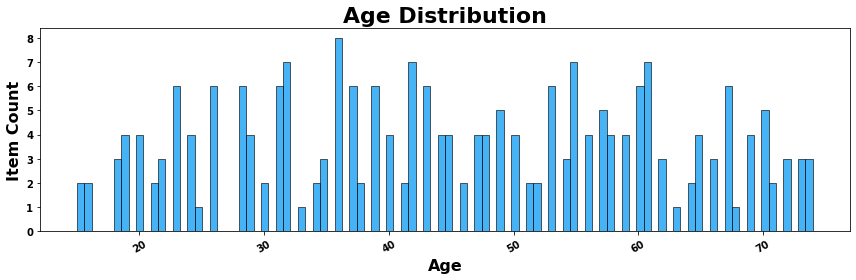

In [ ]:
plt.figure(figsize = (12,4))

sns.histplot(data=df, x='Age', color='#069AF3', bins=100); 

plt.title('Age Distribution', fontsize = 22, weight='bold')
plt.xlabel('Age', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=30)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

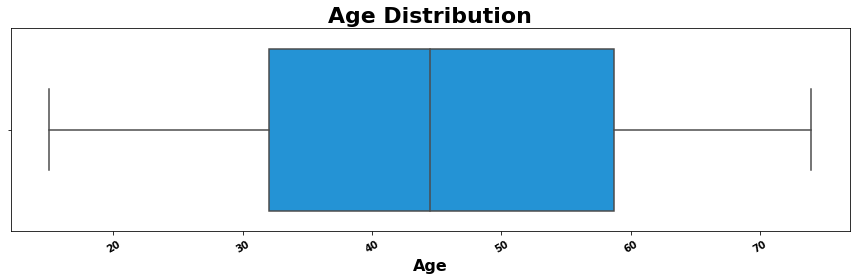

In [ ]:
plt.figure(figsize = (12, 4))

sns.boxplot(data=df, x='Age', color='#069AF3'); 

plt.title('Age Distribution', fontsize = 22, weight='bold')
plt.xlabel('Age', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=30)

plt.tight_layout()
plt.show;

- **Skew** - 'Age' appears to be evenly distributed and not skewed.
- **Outliers** - 'Age' does not have any outliers.
- No issues noted, values appear reasonable.


#### **Na_to_K**

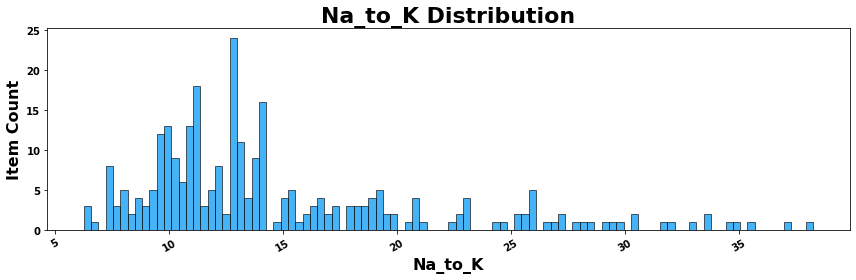

In [ ]:
plt.figure(figsize = (12, 4))

sns.histplot(data=df, x='Na_to_K', color='#069AF3', bins=100); 

plt.title('Na_to_K Distribution', fontsize = 22, weight='bold')
plt.xlabel('Na_to_K', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=30)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

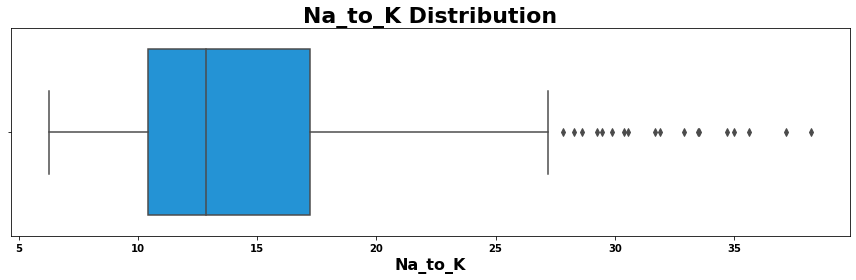

In [ ]:
plt.figure(figsize = (12, 4))

sns.boxplot(data=df, x='Na_to_K', color='#069AF3'); 

plt.title('Na_to_K Distribution', fontsize = 22, weight='bold')
plt.xlabel('Na_to_K', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold')


plt.tight_layout()
plt.show;

- **Skew** - 'Na_to_K' is skewed.
- **Outliers** - 'Na_to_K' does have outliers on the high side.
- No issues noted, values appear reasonable.

### **Categorical Columns**

In [ ]:
df.describe(exclude=('number'))

,Gender,BP,Cholesterol,Drug
count,280,280,280,280
unique,2,4,2,2
top,Male,High,High,drugZ
freq,145,128,151,146


- No issues noted.

#### **Gender**

In [ ]:
df['Gender'].value_counts()

Male      145
Female    135
Name: Gender, dtype: int64

In [ ]:
df['Gender'].value_counts(normalize=True)

Male      0.517857
Female    0.482143
Name: Gender, dtype: float64

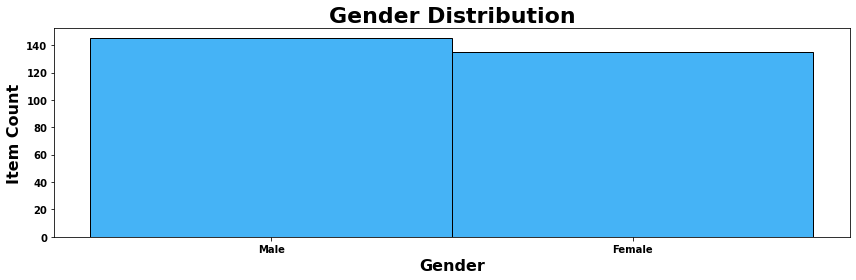

In [ ]:
plt.figure(figsize = (12,4))

sns.histplot(data=df, x='Gender', color='#069AF3'); 

plt.title('Gender Distribution', fontsize = 22, weight='bold');
plt.xlabel('Gender', fontsize = 16, weight='bold');
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

- 'Gender' values appear to be fairly evenly distributed.

#### **BP**

In [ ]:
df['BP'].value_counts()

High       128
Unknown     75
Normal      45
Low         32
Name: BP, dtype: int64

In [ ]:
df['BP'].value_counts(normalize=True)

High       0.457143
Unknown    0.267857
Normal     0.160714
Low        0.114286
Name: BP, dtype: float64

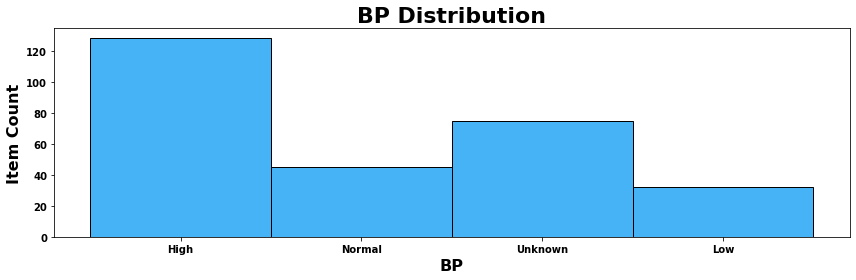

In [ ]:
plt.figure(figsize = (12, 4))

sns.histplot(data=df, x='BP', color='#069AF3'); 

plt.title('BP Distribution', fontsize = 22, weight='bold')
plt.xlabel('BP', fontsize = 16, weight='bold')
plt.ylabel('Item Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

- 'BP' appears to have a significantly higher count of 'High' values, than 'Normal', 'Low', or 'Unknown'

#### **Cholesterol**

In [ ]:
df['Cholesterol'].value_counts()

High      151
Normal    129
Name: Cholesterol, dtype: int64

In [ ]:
df['Cholesterol'].value_counts(normalize=True)

High      0.539286
Normal    0.460714
Name: Cholesterol, dtype: float64

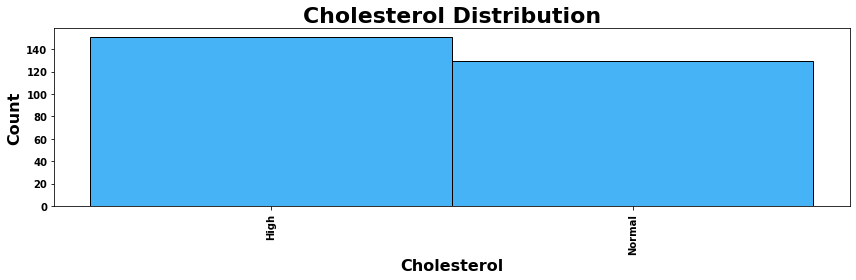

In [ ]:
from matplotlib import lines
plt.figure(figsize = (12, 4))

sns.histplot(data=df, x='Cholesterol', color='#069AF3'); 

plt.title('Cholesterol Distribution', fontsize = 22, weight='bold')
plt.xlabel('Cholesterol', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

- 'Cholesterol' values appear to be fairly evenly distributed.

### **Correlation Heatmap**

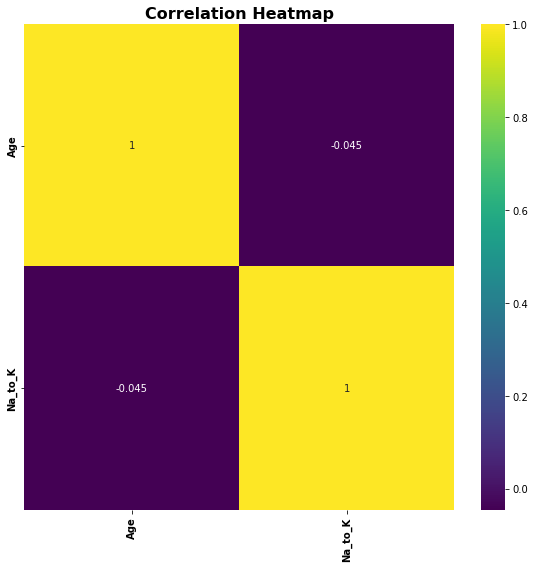

In [ ]:
plt.figure(figsize = (8, 8))

corr = df.corr()
sns.heatmap(corr, cmap='viridis', annot=True);

plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

There correlations between 'Age' and 'NA_to_K' is not high.



---



## **Preprocessing for Machine Learning**

### **Identify each feature as ordinal, numerical, nominal, or pass through**

- ordinal features = ['BP']
- numeric features = ['Age', 'Na_to_K']
- nominal features = ['Gender', 'Cholesterol', 'Drug']
- date/time features = none
- pass through = none

### **Ordinal Encoding**

- Ordinal Encoding can be processed prior to the Train Test split without data leakage.

#### **BP**

In [ ]:
df['BP'].value_counts()

This is currently an object Datatype with 'Low', 'Normal', 'High' and 'Unknown' values.
- We could have left this as an Object Datatype and imputed NaN values using SimpleImputer(strategy='most_frequent'), or
- We could have treated this as an Ordinal Feature and replaced 'Low', 'Normal', and High' values with 0, 1, and 2, then imputed the NaN values which we previosly replaced with 'Unknown' with SimpleImputer(strategy='median') for the NaN values.

However, due the high count of 'Unkown' values we will not ordinal encode this feature, but treat it as a Categorical Feature, and One Hot Encode it.

### **Validation Split**

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns = ['Drug'])
y = df['Drug']

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### **Instantiate Column Selectors**

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
cat_selector(X_train)

In [ ]:
num_selector(X_train)

### **Instantiate Transformers**

In [ ]:
# Imputers
# There are no Categorical features that require imputing
# - So we do not require: freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

### **Instantiate Pipelines**

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)

### **Instantiate ColumnTransformer**

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')